In [1]:
%load_ext autoreload
%autoreload 2

In [19]:
%pylab inline
import numpy as np 

Populating the interactive namespace from numpy and matplotlib


As a bit of a case study we shall implement the PSO algorithm to find the minimum point for a [list of functions](https://en.wikipedia.org/wiki/Test_functions_for_optimization). Note that all of these are minimimisation problems, so we need to negate the functions. Play around with the hyperparameters and setting and see how the results are affected.

In [102]:
class Particle(object):
    def __init__(self, n, low=-50, high=50):
        super().__init__()
        self.state = np.random.uniform(low=low, high=high, size=n)
        self.best_state = np.copy(self.state)
        self.velocity = np.zeros_like(self.state)
        self.best_score = -10000000
    
    def compute_velocity(self, inertia_factor, global_best):
        exploitation = np.random.random() * (self.best_state - self.state)
        exploration = np.random.random() * (global_best.state - self.state)
        inertia = inertia_factor * self.velocity
        self.velocity = inertia + exploration + exploitation
    
    def apply_velocity_update(self):
        self.state = self.state + self.velocity
        
    def compute_fitness(self, fitness_func):
        fitness = fitness_func(self.state)
        if self.best_score < fitness:
            self.best_score = fitness
            self.best_state = self.state
        return fitness

In [103]:
# negated Booth Function https://en.wikipedia.org/wiki/Test_functions_for_optimization

def fitness(state):
    x = state[0]
    y = state[1]
    
    a = x + 2 * y - 7
    a *= a
    
    b = 2 * x + y - 5
    b *= b
    
    return -a - b

In [104]:
n = 2
num_particles = 1000
num_iterations = 100
inertia_factor = 0.5
global_best = np.zeros(n)
global_best_fitness = -1000000000

In [105]:
particles = [Particle(n) for _ in range(num_particles)]
convergence_curve = []

In [106]:
for i in range(num_iterations):
    for p in particles:
        fitness_of_p = p.compute_fitness(fitness)
        if fitness_of_p > global_best_fitness:
            global_best_fitness = fitness_of_p
            global_best = p
    for p in particles:
        p.compute_velocity(inertia_factor, global_best)
    for p in particles:
        p.apply_velocity_update()
    convergence_curve.append(global_best_fitness)

In [108]:
global_best.state

array([1., 3.])

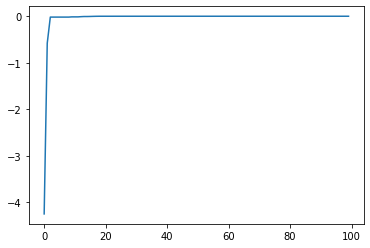

In [109]:
plot(list(range(len(convergence_curve))), convergence_curve)